In [3]:
!pip install keras cython h5py --quiet

In [4]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [5]:
import keras

Using TensorFlow backend.


In [6]:
mixed_data_final = pd.read_pickle('mixed_data_final.data')

In [7]:
X = mixed_data_final['Image'].apply(lambda image: np.fromstring(image, sep=' '))
y = mixed_data_final.drop('Image', axis=1).values

In [8]:
X = (np.vstack(X) / 255).reshape(-1, 96, 96, 1)
y = (y - 48) / 48

In [9]:
from keras.layers import Input, Conv2D, MaxPool2D, Dropout, Activation, Dense, Flatten
from keras.models import Sequential
from keras import optimizers

# CNN 5

In [10]:
# cnn5 = Sequential([
#     Conv2D(40, kernel_size=(4, 4),
#            activation='tanh',
#            input_shape=(96,96,1)),
#     MaxPool2D(pool_size=(2, 2)),
    
#     Conv2D(80, kernel_size=(3, 3),
#            activation='tanh'),
#     MaxPool2D(pool_size=(2, 2)),

#     Conv2D(120, kernel_size=(3, 3),
#            activation='tanh'),
#     MaxPool2D(pool_size=(2, 2)),
    
#     Flatten(),
#     Dense(120, activation='tanh'),

#     Dense(8)
# ])

In [11]:
# n_epochs=500

# cnn5.compile(loss='mse', optimizer='sgd')

In [12]:
# history5 = cnn5.fit(X, y, validation_split=.2, epochs=n_epochs)

Train on 11424 samples, validate on 2856 samples
Epoch 1/500
11424/11424 [==============================] - 20s - loss: 0.0443 - val_loss: 0.0390
Epoch 2/500
11424/11424 [==============================] - 16s - loss: 0.0393 - val_loss: 0.0359
Epoch 3/500
11424/11424 [==============================] - 16s - loss: 0.0367 - val_loss: 0.0343
Epoch 4/500
11424/11424 [==============================] - 16s - loss: 0.0349 - val_loss: 0.0324
Epoch 5/500
11424/11424 [==============================] - 16s - loss: 0.0337 - val_loss: 0.0313
Epoch 6/500
11424/11424 [==============================] - 16s - loss: 0.0327 - val_loss: 0.0302
Epoch 7/500
11424/11424 [==============================] - 16s - loss: 0.0319 - val_loss: 0.0296
Epoch 8/500
11424/11424 [==============================] - 16s - loss: 0.0313 - val_loss: 0.0309
Epoch 9/500
11424/11424 [==============================] - 16s - loss: 0.0308 - val_loss: 0.0284
Epoch 10/500
11424/11424 [==============================] - 16s - loss: 0.0303

11424/11424 [==============================] - 16s - loss: 0.0166 - val_loss: 0.0166
Epoch 85/500
11424/11424 [==============================] - 16s - loss: 0.0164 - val_loss: 0.0162
Epoch 86/500
11424/11424 [==============================] - 16s - loss: 0.0162 - val_loss: 0.0162
Epoch 87/500
11424/11424 [==============================] - 16s - loss: 0.0161 - val_loss: 0.0159
Epoch 88/500
11424/11424 [==============================] - 16s - loss: 0.0159 - val_loss: 0.0157
Epoch 89/500
11424/11424 [==============================] - 16s - loss: 0.0158 - val_loss: 0.0157
Epoch 90/500
11424/11424 [==============================] - 16s - loss: 0.0157 - val_loss: 0.0155
Epoch 91/500
11424/11424 [==============================] - 16s - loss: 0.0155 - val_loss: 0.0157
Epoch 92/500
11424/11424 [==============================] - 16s - loss: 0.0153 - val_loss: 0.0152
Epoch 93/500
11424/11424 [==============================] - 16s - loss: 0.0151 - val_loss: 0.0154
Epoch 94/500
11424/11424 [=======

11424/11424 [==============================] - 16s - loss: 0.0082 - val_loss: 0.0090
Epoch 168/500
11424/11424 [==============================] - 16s - loss: 0.0081 - val_loss: 0.0088
Epoch 169/500
11424/11424 [==============================] - 16s - loss: 0.0080 - val_loss: 0.0088
Epoch 170/500
11424/11424 [==============================] - 16s - loss: 0.0080 - val_loss: 0.0088
Epoch 171/500
11424/11424 [==============================] - 16s - loss: 0.0079 - val_loss: 0.0086
Epoch 172/500
11424/11424 [==============================] - 16s - loss: 0.0079 - val_loss: 0.0089
Epoch 173/500
11424/11424 [==============================] - 16s - loss: 0.0078 - val_loss: 0.0085
Epoch 174/500
11424/11424 [==============================] - 16s - loss: 0.0078 - val_loss: 0.0087
Epoch 175/500
11424/11424 [==============================] - 16s - loss: 0.0077 - val_loss: 0.0086
Epoch 176/500
11424/11424 [==============================] - 16s - loss: 0.0077 - val_loss: 0.0086
Epoch 177/500
11424/1142

11424/11424 [==============================] - 16s - loss: 0.0052 - val_loss: 0.0062
Epoch 250/500
11424/11424 [==============================] - 16s - loss: 0.0052 - val_loss: 0.0062
Epoch 251/500
11424/11424 [==============================] - 16s - loss: 0.0052 - val_loss: 0.0062
Epoch 252/500
11424/11424 [==============================] - 16s - loss: 0.0051 - val_loss: 0.0061
Epoch 253/500
11424/11424 [==============================] - 16s - loss: 0.0051 - val_loss: 0.0061
Epoch 254/500
11424/11424 [==============================] - 16s - loss: 0.0051 - val_loss: 0.0060
Epoch 255/500
11424/11424 [==============================] - 16s - loss: 0.0051 - val_loss: 0.0060
Epoch 256/500
11424/11424 [==============================] - 16s - loss: 0.0050 - val_loss: 0.0060
Epoch 257/500
11424/11424 [==============================] - 16s - loss: 0.0050 - val_loss: 0.0060
Epoch 258/500
11424/11424 [==============================] - 16s - loss: 0.0050 - val_loss: 0.0059
Epoch 259/500
11424/1142

11424/11424 [==============================] - 16s - loss: 0.0039 - val_loss: 0.0048
Epoch 332/500
11424/11424 [==============================] - 16s - loss: 0.0039 - val_loss: 0.0058
Epoch 333/500
11424/11424 [==============================] - 16s - loss: 0.0039 - val_loss: 0.0050
Epoch 334/500
11424/11424 [==============================] - 16s - loss: 0.0038 - val_loss: 0.0048
Epoch 335/500
11424/11424 [==============================] - 16s - loss: 0.0038 - val_loss: 0.0048
Epoch 336/500
11424/11424 [==============================] - 16s - loss: 0.0038 - val_loss: 0.0048
Epoch 337/500
11424/11424 [==============================] - 16s - loss: 0.0038 - val_loss: 0.0048
Epoch 338/500
11424/11424 [==============================] - 16s - loss: 0.0038 - val_loss: 0.0048
Epoch 339/500
11424/11424 [==============================] - 16s - loss: 0.0038 - val_loss: 0.0048
Epoch 340/500
11424/11424 [==============================] - 16s - loss: 0.0038 - val_loss: 0.0049
Epoch 341/500
11424/1142

11424/11424 [==============================] - 16s - loss: 0.0032 - val_loss: 0.0041
Epoch 414/500
11424/11424 [==============================] - 16s - loss: 0.0032 - val_loss: 0.0042
Epoch 415/500
11424/11424 [==============================] - 16s - loss: 0.0032 - val_loss: 0.0041
Epoch 416/500
11424/11424 [==============================] - 16s - loss: 0.0031 - val_loss: 0.0042
Epoch 417/500
11424/11424 [==============================] - 16s - loss: 0.0031 - val_loss: 0.0041
Epoch 418/500
11424/11424 [==============================] - 16s - loss: 0.0031 - val_loss: 0.0041
Epoch 419/500
11424/11424 [==============================] - 16s - loss: 0.0031 - val_loss: 0.0042
Epoch 420/500
11424/11424 [==============================] - 16s - loss: 0.0031 - val_loss: 0.0042
Epoch 421/500
11424/11424 [==============================] - 16s - loss: 0.0031 - val_loss: 0.0041
Epoch 422/500
11424/11424 [==============================] - 16s - loss: 0.0031 - val_loss: 0.0041
Epoch 423/500
11424/1142

11424/11424 [==============================] - 16s - loss: 0.0027 - val_loss: 0.0038
Epoch 496/500
11424/11424 [==============================] - 16s - loss: 0.0027 - val_loss: 0.0037
Epoch 497/500
11424/11424 [==============================] - 16s - loss: 0.0027 - val_loss: 0.0037
Epoch 498/500
11424/11424 [==============================] - 16s - loss: 0.0027 - val_loss: 0.0037
Epoch 499/500
11424/11424 [==============================] - 16s - loss: 0.0027 - val_loss: 0.0037
Epoch 500/500
11424/11424 [==============================] - 16s - loss: 0.0027 - val_loss: 0.0037


In [13]:
cnn5.save('cnn5.h5')

with open('history5.dict', 'wb') as handle:
    pickle.dump(history5.history, handle)

In [14]:
with open('history5.dict', 'rb') as handle:
    cnn5_history = pickle.load(handle)

In [15]:
cnn5_rmse = np.sqrt(cnn5.evaluate(X, y)) * 48
cnn5_rmse

14176/14280 [============================>.] - ETA: 0s

2.5664191136989771

# CNN 6

In [20]:
cnn6 = Sequential([
    Conv2D(40, kernel_size=(4, 4),
           activation='tanh',
           input_shape=(96,96,1)),
    MaxPool2D(pool_size=(2, 2)),
    
    Conv2D(80, kernel_size=(3, 3),
           activation='tanh'),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(120, kernel_size=(3, 3),
           activation='tanh'),
    MaxPool2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(120, activation='tanh'),

    Dense(8)
])

In [21]:
n_epochs=200
start_learning_rate = .03
stop_learning_rate = .001
decay_rate = (start_learning_rate - stop_learning_rate) / n_epochs

sgd = optimizers.SGD(lr=start_learning_rate, decay=decay_rate)

cnn6.compile(loss='mse', optimizer=sgd)

In [22]:
history6 = cnn6.fit(X, y, validation_split=.2, epochs=n_epochs)

Train on 11424 samples, validate on 2856 samples
Epoch 1/200
11424/11424 [==============================] - 16s - loss: 0.0413 - val_loss: 0.0351
Epoch 2/200
11424/11424 [==============================] - 16s - loss: 0.0347 - val_loss: 0.0319
Epoch 3/200
11424/11424 [==============================] - 16s - loss: 0.0319 - val_loss: 0.0290
Epoch 4/200
11424/11424 [==============================] - 16s - loss: 0.0304 - val_loss: 0.0278
Epoch 5/200
11424/11424 [==============================] - 16s - loss: 0.0293 - val_loss: 0.0272
Epoch 6/200
11424/11424 [==============================] - 16s - loss: 0.0285 - val_loss: 0.0265
Epoch 7/200
11424/11424 [==============================] - 16s - loss: 0.0278 - val_loss: 0.0259
Epoch 8/200
11424/11424 [==============================] - 16s - loss: 0.0272 - val_loss: 0.0254
Epoch 9/200
11424/11424 [==============================] - 16s - loss: 0.0268 - val_loss: 0.0250
Epoch 10/200
11424/11424 [==============================] - 16s - loss: 0.0263

11424/11424 [==============================] - 16s - loss: 0.0111 - val_loss: 0.0116
Epoch 168/200
11424/11424 [==============================] - 16s - loss: 0.0111 - val_loss: 0.0116
Epoch 169/200
11424/11424 [==============================] - 16s - loss: 0.0111 - val_loss: 0.0115
Epoch 170/200
11424/11424 [==============================] - 16s - loss: 0.0110 - val_loss: 0.0116
Epoch 171/200
11424/11424 [==============================] - 16s - loss: 0.0110 - val_loss: 0.0115
Epoch 172/200
11424/11424 [==============================] - 16s - loss: 0.0110 - val_loss: 0.0115
Epoch 173/200
11424/11424 [==============================] - 16s - loss: 0.0110 - val_loss: 0.0115
Epoch 174/200
11424/11424 [==============================] - 16s - loss: 0.0109 - val_loss: 0.0114
Epoch 175/200
11424/11424 [==============================] - 16s - loss: 0.0109 - val_loss: 0.0114
Epoch 176/200
11424/11424 [==============================] - 16s - loss: 0.0109 - val_loss: 0.0113
Epoch 177/200
11424/1142

In [82]:
cnn6.save('cnn6.h5')

with open('history6.dict', 'wb') as handle:
    pickle.dump(history6.history, handle)

In [24]:
cnn6_rmse = np.sqrt(cnn6.evaluate(X, y)) * 48
cnn6_rmse

14240/14280 [============================>.] - ETA: 0s

4.8916535366845588

# CNN 7

In [29]:
cnn7 = Sequential([
    Conv2D(40, kernel_size=(4, 4),
           activation='tanh',
           input_shape=(96,96,1)),
    MaxPool2D(pool_size=(2, 2)),
    
    Conv2D(80, kernel_size=(3, 3),
           activation='tanh'),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(120, kernel_size=(3, 3),
           activation='tanh'),
    
    Flatten(),
    Dense(1000, activation='tanh'),

    Dense(8)
])

In [30]:
n_epochs=200

cnn7.compile(loss='mse', optimizer='sgd')

In [31]:
history7 = cnn7.fit(X, y, validation_split=.2, epochs=n_epochs)

Train on 11424 samples, validate on 2856 samples
Epoch 1/200
11424/11424 [==============================] - 27s - loss: 0.0417 - val_loss: 0.0346
Epoch 2/200
11424/11424 [==============================] - 26s - loss: 0.0351 - val_loss: 0.0320
Epoch 3/200
11424/11424 [==============================] - 26s - loss: 0.0327 - val_loss: 0.0299
Epoch 4/200
11424/11424 [==============================] - 26s - loss: 0.0311 - val_loss: 0.0289
Epoch 5/200
11424/11424 [==============================] - 26s - loss: 0.0301 - val_loss: 0.0277
Epoch 6/200
11424/11424 [==============================] - 26s - loss: 0.0293 - val_loss: 0.0275
Epoch 7/200
11424/11424 [==============================] - 26s - loss: 0.0286 - val_loss: 0.0268
Epoch 8/200
11424/11424 [==============================] - 26s - loss: 0.0280 - val_loss: 0.0262
Epoch 9/200
11424/11424 [==============================] - 26s - loss: 0.0275 - val_loss: 0.0259
Epoch 10/200
11424/11424 [==============================] - 26s - loss: 0.0271

11424/11424 [==============================] - 26s - loss: 0.0101 - val_loss: 0.0117
Epoch 168/200
11424/11424 [==============================] - 26s - loss: 0.0100 - val_loss: 0.0120
Epoch 169/200
11424/11424 [==============================] - 26s - loss: 0.0100 - val_loss: 0.0117
Epoch 170/200
11424/11424 [==============================] - 26s - loss: 0.0099 - val_loss: 0.0117
Epoch 171/200
11424/11424 [==============================] - 26s - loss: 0.0098 - val_loss: 0.0115
Epoch 172/200
11424/11424 [==============================] - 26s - loss: 0.0097 - val_loss: 0.0117
Epoch 173/200
11424/11424 [==============================] - 26s - loss: 0.0097 - val_loss: 0.0113
Epoch 174/200
11424/11424 [==============================] - 26s - loss: 0.0096 - val_loss: 0.0113
Epoch 175/200
11424/11424 [==============================] - 26s - loss: 0.0096 - val_loss: 0.0113
Epoch 176/200
11424/11424 [==============================] - 26s - loss: 0.0095 - val_loss: 0.0114
Epoch 177/200
11424/1142

In [83]:
cnn7.save('cnn7.h5')

with open('history7.dict', 'wb') as handle:
    pickle.dump(history7.history, handle)

In [33]:
cnn7_rmse = np.sqrt(cnn7.evaluate(X, y)) * 48
cnn7_rmse

14208/14280 [============================>.] - ETA: 0s

4.3372855011967051

# CNN 8

In [36]:
cnn8 = Sequential([
    Conv2D(40, kernel_size=(4, 4),
           activation='tanh',
           input_shape=(96,96,1)),
    MaxPool2D(pool_size=(2, 2)),
    
    Conv2D(80, kernel_size=(3, 3),
           activation='tanh'),
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(120, kernel_size=(3, 3),
           activation='tanh'),
    MaxPool2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(120, activation='tanh'),

    Dense(8)
])

In [37]:
n_epochs=200
start_learning_rate = .03
stop_learning_rate = .005
decay_rate = (start_learning_rate - stop_learning_rate) / n_epochs

sgd = optimizers.SGD(lr=start_learning_rate, decay=decay_rate)

cnn8.compile(loss='mse', optimizer=sgd)

In [38]:
history8 = cnn8.fit(X, y, validation_split=.2, epochs=n_epochs)

Train on 11424 samples, validate on 2856 samples
Epoch 1/200
11424/11424 [==============================] - 16s - loss: 0.0416 - val_loss: 0.0347
Epoch 2/200
11424/11424 [==============================] - 16s - loss: 0.0351 - val_loss: 0.0317
Epoch 3/200
11424/11424 [==============================] - 16s - loss: 0.0324 - val_loss: 0.0300
Epoch 4/200
11424/11424 [==============================] - 16s - loss: 0.0309 - val_loss: 0.0289
Epoch 5/200
11424/11424 [==============================] - 16s - loss: 0.0297 - val_loss: 0.0273
Epoch 6/200
11424/11424 [==============================] - 16s - loss: 0.0288 - val_loss: 0.0266
Epoch 7/200
11424/11424 [==============================] - 16s - loss: 0.0281 - val_loss: 0.0260
Epoch 8/200
11424/11424 [==============================] - 16s - loss: 0.0274 - val_loss: 0.0254
Epoch 9/200
11424/11424 [==============================] - 16s - loss: 0.0269 - val_loss: 0.0250
Epoch 10/200
11424/11424 [==============================] - 16s - loss: 0.0264

11424/11424 [==============================] - 16s - loss: 0.0094 - val_loss: 0.0101
Epoch 168/200
11424/11424 [==============================] - 16s - loss: 0.0094 - val_loss: 0.0101
Epoch 169/200
11424/11424 [==============================] - 16s - loss: 0.0094 - val_loss: 0.0101
Epoch 170/200
11424/11424 [==============================] - 16s - loss: 0.0093 - val_loss: 0.0101
Epoch 171/200
11424/11424 [==============================] - 16s - loss: 0.0093 - val_loss: 0.0101
Epoch 172/200
11424/11424 [==============================] - 16s - loss: 0.0093 - val_loss: 0.0100
Epoch 173/200
11424/11424 [==============================] - 16s - loss: 0.0093 - val_loss: 0.0100
Epoch 174/200
11424/11424 [==============================] - 16s - loss: 0.0092 - val_loss: 0.0100
Epoch 175/200
11424/11424 [==============================] - 16s - loss: 0.0092 - val_loss: 0.0099
Epoch 176/200
11424/11424 [==============================] - 16s - loss: 0.0092 - val_loss: 0.0100
Epoch 177/200
11424/1142

In [84]:
cnn8.save('cnn8.h5')

with open('history8.dict', 'wb') as handle:
    pickle.dump(history8.history, handle)

In [40]:
cnn8_rmse = np.sqrt(cnn8.evaluate(X, y)) * 48
cnn8_rmse

14272/14280 [============================>.] - ETA: 0s

4.5000755667018284

['loss', 'val_loss']


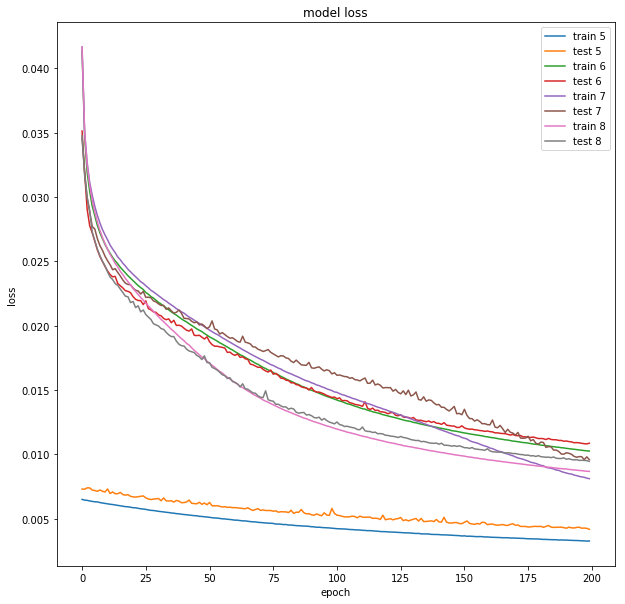

In [45]:
print(history5.history.keys())

plt.figure(figsize=(10,10))
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])

plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])

plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])

plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train 5', 'test 5', 'train 6', 'test 6', 'train 7', 'test 7', 'train 8', 'test 8'], loc='upper right')
plt.show()

In [16]:
from keras.models import load_model
cnn1 = load_model('cnn1.h5')

In [21]:
mse_cnn1 = cnn1.evaluate(X2, y)

14272/14280 [============================>.] - ETA: 0s

In [22]:
rmse_cnn1 = np.sqrt(mse_cnn1) * 48
rmse_cnn1

9.9278348279110631

In [16]:
with zipfile.ZipFile('data/test.zip') as zip:
    with zip.open('test.csv') as myZip:
        df_test = pd.read_csv(myZip)

In [17]:
X_test = df_test['Image'].apply(lambda image: np.fromstring(image, sep=' '))
X_test = np.vstack(X_test)/255

In [18]:
X2_test = X_test.reshape(-1, 96, 96, 1)

In [19]:
y_pred_cnn = cnn5.predict(X2_test)

In [20]:
y_pred_cnn = y_pred_cnn*48 + 48

In [21]:
cnn_pred_df = pd.DataFrame(y_pred_cnn, columns=mixed_data_final.drop('Image', axis=1).columns)

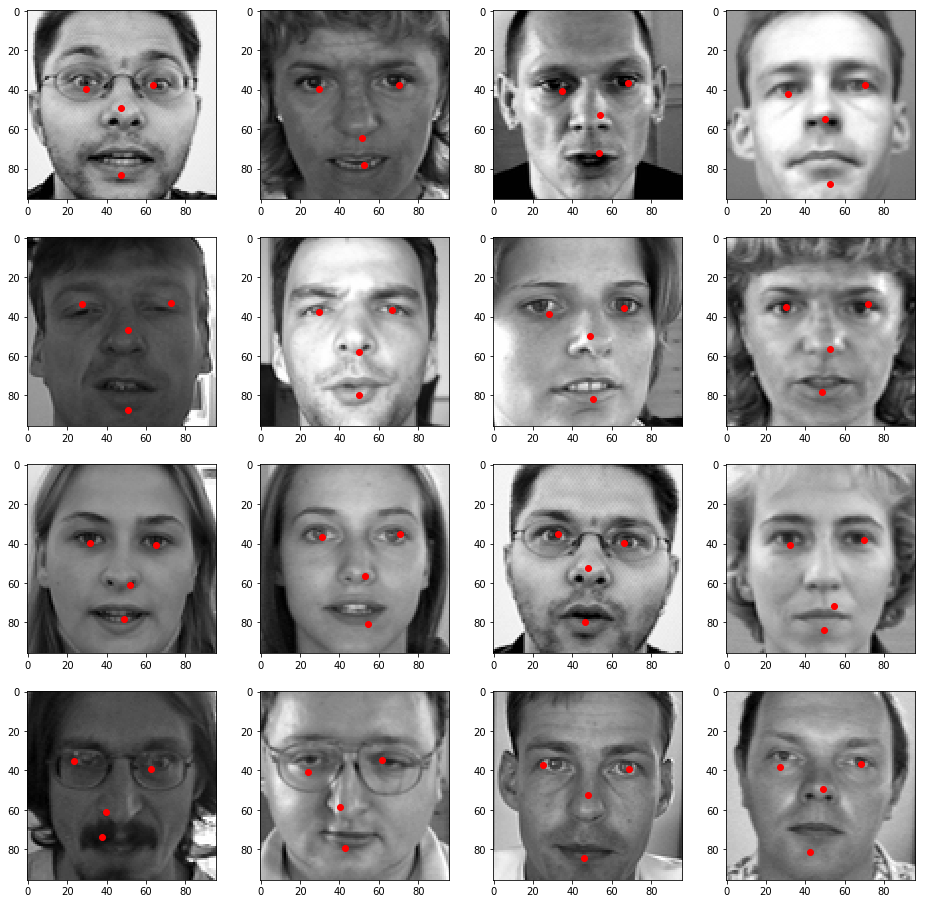

In [22]:
f, ax = plt.subplots(4, 4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        for k in range(4):
            ax[i, j].plot(cnn_pred_df.iloc[i*4 + j, 2*k], cnn_pred_df.iloc[i*4 + j, 2*k+1], c='r', marker='o')
        ax[i, j].imshow(X_test[i*4 + j].reshape(96, 96), cmap='gray')

In [23]:
a = mixed_data_final[mixed_data_final['nose_tip_y'] == max(mixed_data_final['nose_tip_y'])].iloc[1,:]

In [24]:
b = np.fromstring(a.Image, sep=' ')
b = np.vstack(b)/255

In [25]:
c = b.reshape(-1, 96, 96, 1)

In [26]:
single_pred = cnn5.predict(c)*48 +48
single_pred = pd.DataFrame(single_pred, columns=mixed_data_final.drop('Image', axis=1).columns)

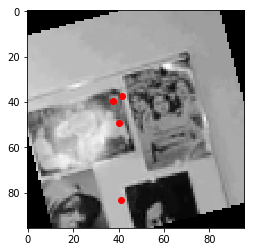

In [27]:
for k in range(4):
    plt.plot(single_pred.iloc[0, 2*k], cnn_pred_df.iloc[0, 2*k+1], c='r', marker='o')
plt.imshow(b.reshape(96, 96), cmap='gray')

In [28]:
y_train_pred_cnn = cnn5.predict(X)

In [29]:
y_train_pred_cnn = y_train_pred_cnn*48 + 48

In [30]:
cnn_train_pred_df = pd.DataFrame(y_train_pred_cnn, columns=mixed_data_final.drop('Image', axis=1).columns)

In [31]:
from random import randint

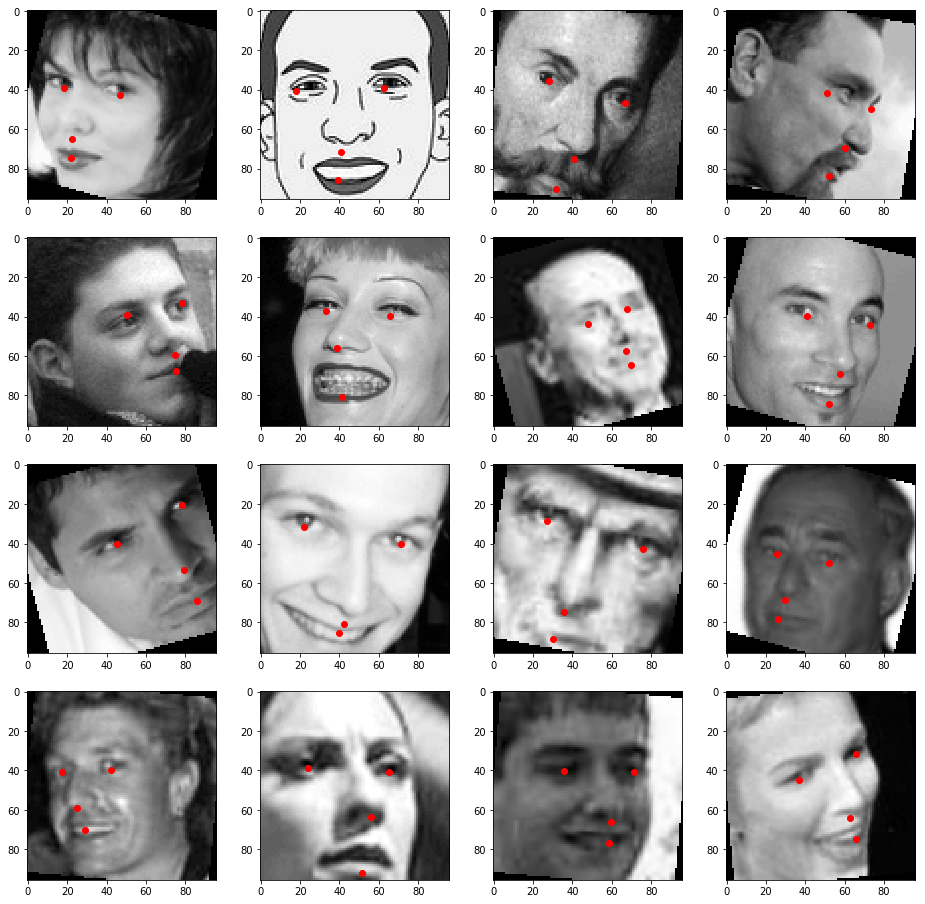

In [32]:
rndm = randint(0, 4000)
f, ax = plt.subplots(4, 4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        for k in range(4):
            ax[i, j].plot(cnn_train_pred_df.iloc[i*4 + j + rndm, 2*k], cnn_train_pred_df.iloc[i*4 + j + rndm, 2*k+1], c='r', marker='o')
        ax[i, j].imshow(X[i*4 + j + rndm].reshape(96, 96), cmap='gray')

In [33]:
with zipfile.ZipFile('data/training.zip') as zip:
    with zip.open('training.csv') as myZip:
        df = pd.read_csv(myZip)

In [34]:
df = df.loc[:, ['nose_tip_x', 'nose_tip_y',
                'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y',
                'left_eye_center_x', 'left_eye_center_y',
                'right_eye_center_x', 'right_eye_center_y',
                'Image']
           ].dropna()

df.shape

(7000, 9)

In [35]:
X_train = df['Image'].apply(lambda image: np.fromstring(image, sep=' '))
y_train = df.drop('Image', axis=1).values

In [36]:
X_train = np.vstack(X_train) / 255
y_train = (y_train - 48) / 48

In [37]:
X2_train = X_train.reshape(-1, 96, 96, 1)

In [38]:
# cnn.evaluate(X2_train, y_train)

In [39]:
original_df_preds = cnn5.predict(X2_train)

In [40]:
original_df_preds = original_df_preds*48 + 48

In [41]:
original_df_preds = pd.DataFrame(original_df_preds, columns=mixed_data_final.drop('Image', axis=1).columns)

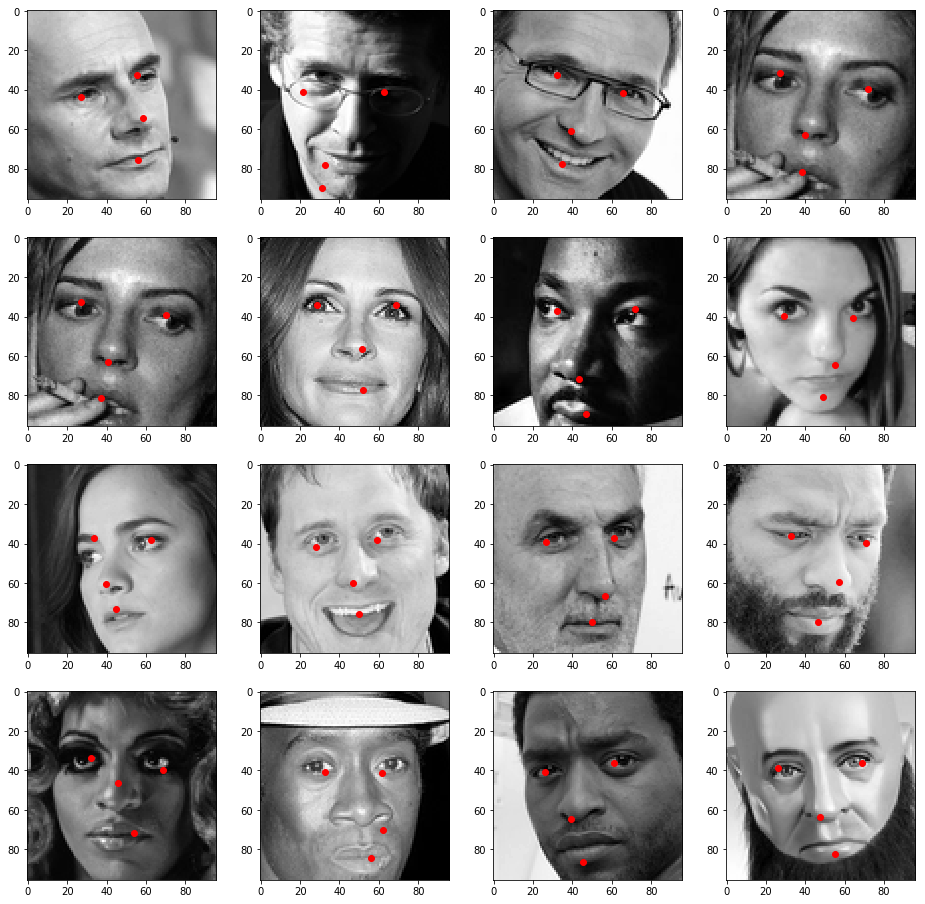

In [43]:
rndm = randint(0, 6980)
f, ax = plt.subplots(4, 4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        for k in range(4):
            ax[i, j].plot(original_df_preds.iloc[i*4 + j + rndm, 2*k], original_df_preds.iloc[i*4 + j + rndm, 2*k+1], c='r', marker='o')
        ax[i, j].imshow(X_train[i*4 + j + rndm].reshape(96, 96), cmap='gray')

In [44]:
rndm

1759

1759